#Trabajo Práctico 1: Modelos Predictivos en SciKit-Learn

Consigna en GitHub: https://github.com/IgnacioPardo/Tecnologias_Exponenciales_2023/blob/main/Consigna_ModelosPredictivos.md

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

####1. Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

Dataset en Kaggle: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Maternal_Health_Risk_Data_Set.csv')
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


####2. Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería `seaborn` para realizar los gráficos.

In [ ]:
data.shape

(1014, 7)

In [ ]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

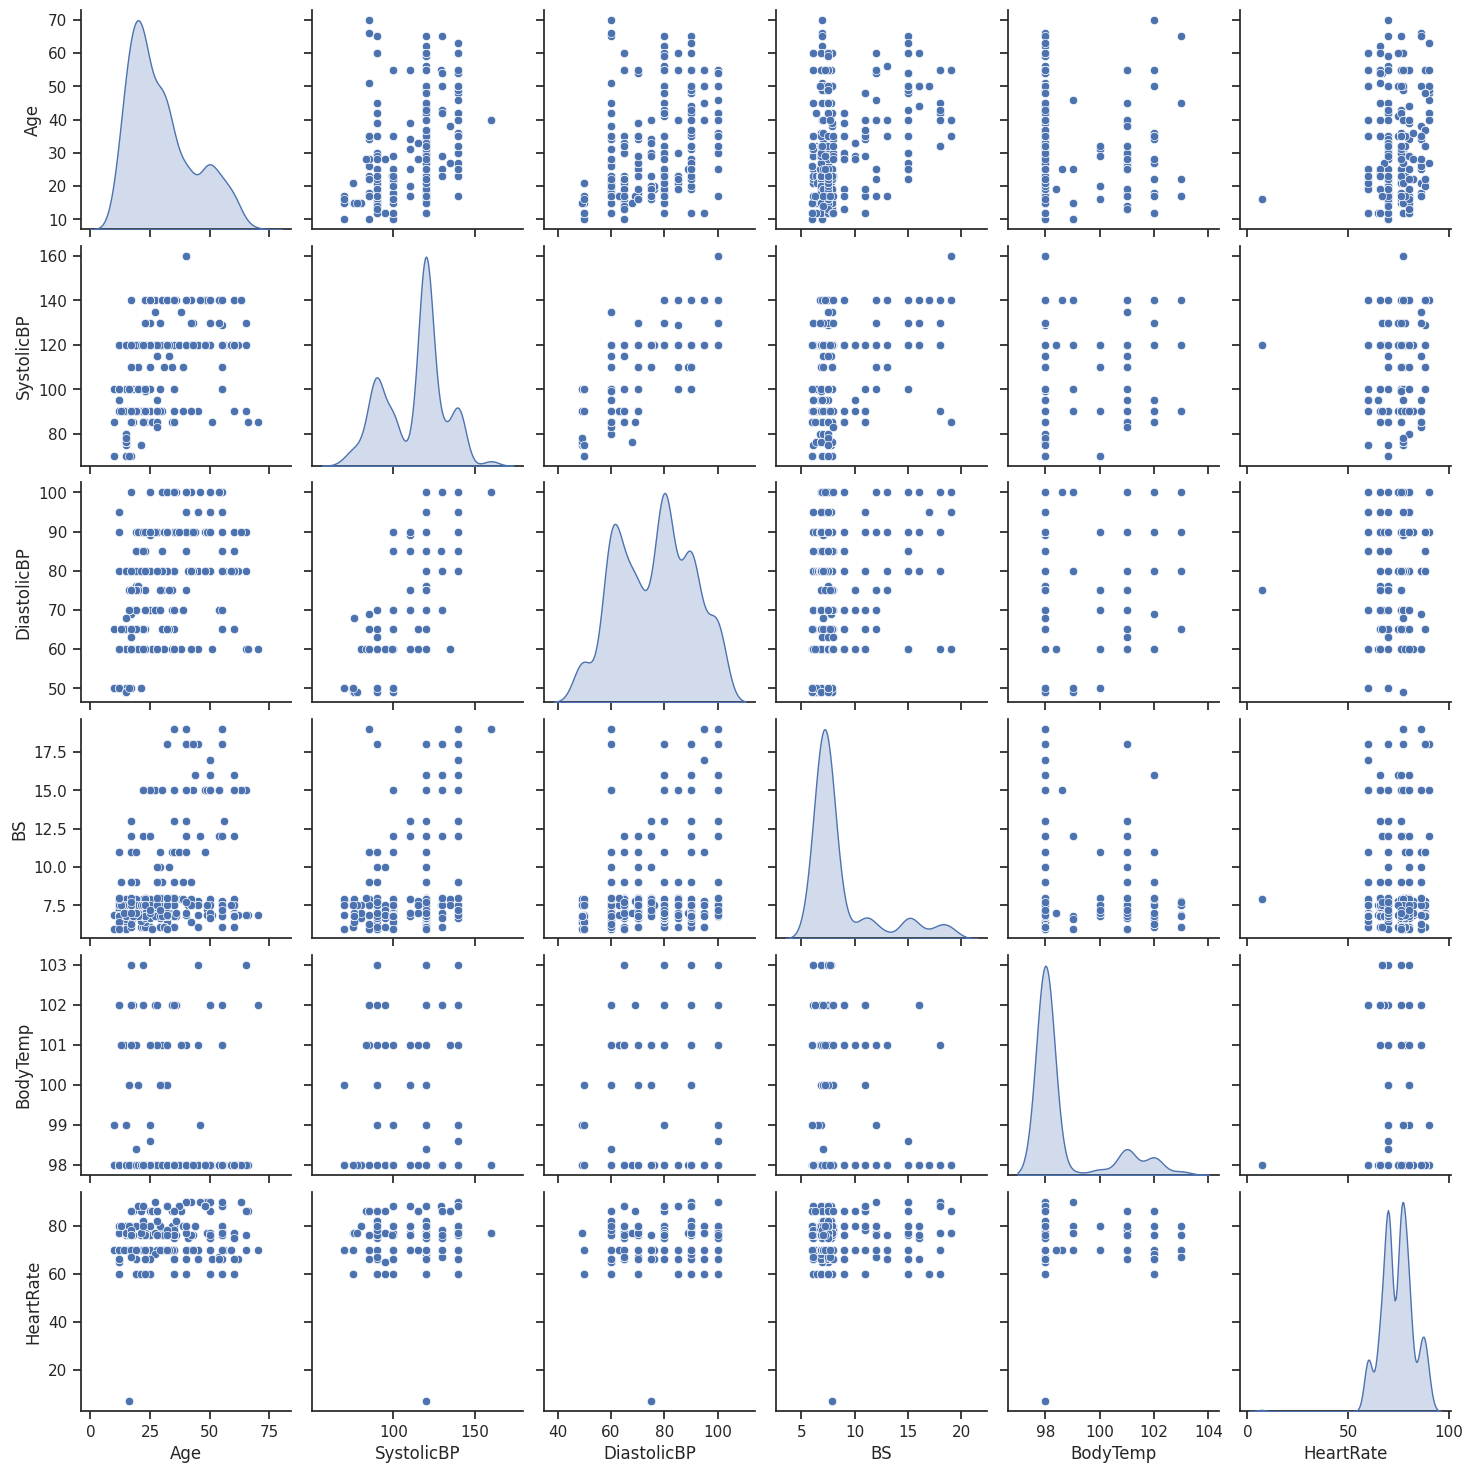

In [ ]:
sns.set(style="ticks")
sns.pairplot(data, diag_kind='kde')

plt.show()

<ipython-input-11-3cf5dba9a79d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


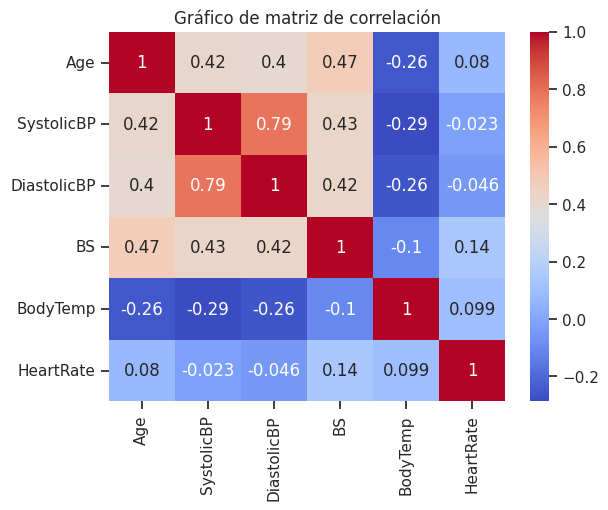

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Gráfico de matriz de correlación')
plt.show()

####3. Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función `LabelEncoder` de SciKit-Learn para convertir el atributo categórico a numérico.

Elegimos `'Age'` (que hace referencia a la edad en la que la mujer estuvo embarazada) como atributo numérico y `'RiskLevel'` (que refiere al nivel de riesgo durante el embarazo) como atributo categórico.

In [ ]:
#primero encodeamos la columna 'RiskLevel' con one hot encoding y la convertimos en dataframe
encoder = OneHotEncoder(sparse=False)
RiskLevel_encoded = encoder.fit_transform(data[['RiskLevel']])
RiskLevel_encoded = pd.DataFrame(RiskLevel_encoded, columns=encoder.get_feature_names_out(['RiskLevel']))

#concatenamos la columna encodeada al dataset original
data = pd.concat([data, RiskLevel_encoded], axis=1)
data = data.drop('RiskLevel', axis=1)

data.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
0,25,130,80,15.00,98.0,86,1.0,0.0,0.0
1,35,140,90,13.00,98.0,70,1.0,0.0,0.0
2,29,90,70,8.00,100.0,80,1.0,0.0,0.0
3,30,140,85,7.00,98.0,70,1.0,0.0,0.0
4,35,120,60,6.10,98.0,76,0.0,1.0,0.0
5,23,140,80,7.01,98.0,70,1.0,0.0,0.0
6,23,130,70,7.01,98.0,78,0.0,0.0,1.0
7,35,85,60,11.00,102.0,86,1.0,0.0,0.0
8,32,120,90,6.90,98.0,70,0.0,0.0,1.0
9,42,130,80,18.00,98.0,70,1.0,0.0,0.0


In [ ]:
#sacamos las columnas que no sirven
#nos quedamos con la columna de alto riesgo y decimos que cuando es 1 hay risgo y cuando es 0 no hay riesgo
data = data.drop(['RiskLevel_low risk', 'RiskLevel_mid risk'], axis = 1)

In [ ]:
#le cambiamos el nombre a las columnas nuevas para que quede mejor
#data.rename(columns={'RiskLevel_high risk': 'Risk'}.rename)
data = data.rename(columns={'RiskLevel_high risk': "Risk"})
data.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Risk
0,25,130,80,15.0,98.0,86,1.0
1,35,140,90,13.0,98.0,70,1.0
2,29,90,70,8.0,100.0,80,1.0
3,30,140,85,7.0,98.0,70,1.0
4,35,120,60,6.1,98.0,76,0.0


In [ ]:
type(data)

pandas.core.frame.DataFrame

####4. Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función `train_test_split` de SciKit-Learn.

In [ ]:
Y_categorical = data[['Risk']].copy() #resultado
X_categorical = data.drop(['Risk'], axis = 1) #atributos

In [ ]:
X_train_categorical, X_test_categorical, Y_train_categorical, Y_test_categorical = train_test_split(X_categorical, Y_categorical, test_size = 0.3, random_state = 42)

In [ ]:
Y_numerical = data[['Age']].copy() #resultado
X_numerical = data.drop(['Age'], axis = 1) #atributos

In [ ]:
X_train_numerical, X_test_numerical, Y_train_numerical, Y_test_numerical = train_test_split(X_numerical, Y_numerical, test_size = 0.3, random_state = 42)

#### 5. Para el atributo numérico a predecir seleccionado:

*   Realizar un modelo de regresión lineal utilizando la clase `LinearRegression` de SciKit-Learn.
*   Realizar un modelo de Árbol de Decisión utilizando la clase `DecisionTreeRegressor` de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.



**Sugerencia**: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función `cross_val_score` de SciKit-Learn para evaluar los modelos.

*   Se recomienda utilizar la función `cross_val_score` de SciKit-Learn para evaluar los modelos.



**Responder: ¿Qué formas tienen de evaluar los resultados de cada árbol de decisión? ¿Cómo eligen "el mejor árbol"? ¿Cómo se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?**

En ambos modelos utilizamos la función `cross_val_score` para ver cual era el error cuadrático medio, y luego hicimos un promedio. En cuanto a la elección del mejor árbol, fuimos cambiando el valor de `min_samples_leaf` y volvimos a evaluar para ver cual era la cantidad de hojas que nos daba un menor error.

Al comparar los resultados de ambos modelos, nos dimos cuenta de que el modelo de regresión lineal nos dio un error mayor al del modelo de arbol de decisión, por lo que interpretamos que este último es el que mejor funciona de los dos. Sin embargo, como se puede apreciar, los dos modelos tienen un error abismal.

#####**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
Linear_Regression_Model = LinearRegression().fit(X_train_numerical, Y_train_numerical)

In [ ]:
mseLR_scores = cross_val_score(Linear_Regression_Model, X_train_numerical, Y_train_numerical, cv = 3, scoring = 'neg_mean_squared_error')
mseLR_scores = -mseLR_scores
mean_mseLR = np.mean(mseLR_scores)

In [ ]:
print("Puntuaciones de error cuadrático medio (MSE) en cada fold: ", mseLR_scores)
print("Error cuadrático medio (MSE) promedio: ", mean_mseLR)

Puntuaciones de error cuadrático medio (MSE) en cada fold:  [142.30654694 110.8561107  122.95076154]
Error cuadrático medio (MSE) promedio:  125.37113972547547


#####**Decision Tree (Regressor)**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Decision_Tree_Regressor_Model = DecisionTreeRegressor(random_state = 42, min_samples_leaf = 3).fit(X_train_numerical, Y_train_numerical)

In [ ]:
mseTR_scores = cross_val_score(Decision_Tree_Regressor_Model, X_train_numerical, Y_train_numerical, cv = 3, scoring = 'neg_mean_squared_error')
mseTR_scores = -mseTR_scores
mean_mseTR = np.mean(mseTR_scores)

In [ ]:
print("Puntuaciones de error cuadrático medio (MSE) en cada fold: ", mseTR_scores)
print("Error cuadrático medio (MSE) promedio: ", mean_mseTR)

Puntuaciones de error cuadrático medio (MSE) en cada fold:  [108.62531849 104.94731973  95.10025459]
Error cuadrático medio (MSE) promedio:  102.89096427138155


#### 6. Para el atributo categórico a predecir seleccionado


*   Realizar un modelo de clasificación utilizano la clase `LogisticRegression` de SciKit-Learn
*   Realizar un modelo de clasificación utilizano la clase `DecisionTreeClassifier` de SciKit-Learn



**Responder: ¿Qué formas tienen de evaluar los resultados de cada árbol de decisión? ¿Cómo eligen "el mejor árbol"? ¿Cómo se comparan los resultados de los modelos de regresión logística y de árbol de decisión?**

Hicimos lo mismo que en el punto anterior, calculamos el error cuadrático medio con `cross_val_score` y fuimos probando diferentes valores para `min_samples_leaf` para elegir el que nos generaba menor error.

Comparando los resultados vimos que el arbol de decisión (clasificador) tuvo un mejor desempeño que el modelo de regresión logística. Comparandolos con los modelos anteriores, estos tienen un error significativamente menor, suponemos que es por los diferentes atributos que elegimos para predecir y su relación con los demás datos.

#####**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Y_train_categorical = Y_train_categorical['Risk'].values.ravel()

In [ ]:
Logistic_Regression_Model = LogisticRegression().fit(X_train_categorical, Y_train_categorical)

In [ ]:
mseLogR_scores = cross_val_score(Logistic_Regression_Model, X_train_categorical, Y_train_categorical, cv = 3, scoring = 'neg_mean_squared_error')
mseLogR_scores = -mseLogR_scores
mean_mseLogR = np.mean(mseLogR_scores)

In [ ]:
print("Puntuaciones de error cuadrático medio (MSE) en cada fold : ", mseLogR_scores)
print("Error cuadrático medio (MSE) promedio : ", mean_mseLogR)

Puntuaciones de error cuadrático medio (MSE) en cada fold :  [0.11814346 0.19915254 0.15254237]
Error cuadrático medio (MSE) promedio :  0.15661279172328305


#####**Decision Tree (Classifier)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Decision_Tree_Classifier_Model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 1).fit(X_train_categorical, Y_train_categorical)

In [ ]:
mseTC_scores = cross_val_score(Decision_Tree_Classifier_Model, X_train_categorical, Y_train_categorical, cv = 3, scoring = 'neg_mean_squared_error')
mseTC_scores = -mseTC_scores
mean_mseTC = np.mean(mseTC_scores)

In [ ]:
print("Puntuaciones de error cuadrático medio (MSE) en cada fold : ", mseTC_scores)
print("Error cuadrático medio (MSE) promedio : ", mean_mseTC)

Puntuaciones de error cuadrático medio (MSE) en cada fold :  [0.06329114 0.06779661 0.0720339 ]
Error cuadrático medio (MSE) promedio :  0.06770721590502753


####7. Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?

La mayoría de los métodos de validación cruzada que investigamos son muy parecidos con algunas particualridades, sin embargo, todos dan resultados ligeramente diferentes, a pesar de que son todos alrededor del `0.84`. La mayoría son muy rápidos con nuestros datos a excepción del método Leave-One-Out, que nos resultó un poco más lento. Cada método encaja con una situación diferente, que varía en nuestro objetivo con los datos y las individualidades de la agrupación y proporción de clases de nuestros datos.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, GroupKFold, ShuffleSplit

#####**Método K-Fold**

El metodo `K fold` de  validación cruzada (que es el que estuvimos usando) divide los datos en K pliegues del mismo tamaño y realiza K iteraciones de train y test. En cada iteración, uno de los pliegues se utiliza para test y los demás se usan para train. Cuando lo usamos vimos que es bastante rápido y fácil de usar, además de que nos proporciona una evaluación robusta del modelo al promediar k conjuntos de entrenamiento y prueba diferentes. Una desventaja que tiene este método es que no es adecuado para conjuntos de datos extremadamente grandes a causa del costo computacional que implica.

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
kf_scores = cross_val_score(Logistic_Regression_Model, X_train_categorical, Y_train_categorical, cv = kf)
kf_mean = np.mean(kf_scores)
print("KFold Scores:", kf_scores)
print("Mean:", kf_mean)

KFold Scores: [0.86619718 0.83802817 0.8028169  0.83802817 0.83687943]
Mean: 0.836389971031865


#####**Método Leave-One-Out (LOOCV)**

El método `Leave-One-Out` consiste en utilizar cada ejemplo de nuestro dataset exactamente una vez como conjunto de test , mientras que los ejemplos restantes se usan como conjunto de train. Esta secuencia se repite para cada uno de los ejemplos en neustro conjunto de datos, lo cual, claramente, implica un mayor período de tiempo. Su mayor ventaja es que este método nos proporciona una estimación muy precisa del rendimiento de nuetro modelo, ya que entrena y evalúa en todos los datos. Sin embargo, esta misma es su desventaja, ya que un proceso tan grande conlleva a un alto costo computacional si el conjunto de datos es muy extenso. No obstante, si nuestro conjunto de datos es demasiado pequeño, a pesar de que habría un menor costo computacional, corremos el riesgo de alta varianza en estimaciones.

In [ ]:
loocv = LeaveOneOut()
loocv_scores = cross_val_score(Logistic_Regression_Model, X_train_categorical, Y_train_categorical, cv=loocv)
loocv_mean = np.mean(loocv_scores)
print("LOOCV Scores:", loocv_scores)
print("Mean:", loocv_mean)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LOOCV Scores: [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#####**Método Stratified K-Fold**

El método `Stratified K-Fold` es my similar al `K-Fold`, pero mantiene una proporcion de clases en cada fold, lo cual es útil para datasets con clases desequilibradas. No obstante, suele tener un costo computacional mayor al método `K-Fold` estándar, lo que implica más lentitud en el proceso. Además, este método no es adecuado si la variable objetivo es continua.

In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stratified_kf_scores = cross_val_score(Logistic_Regression_Model, X_train_categorical, Y_train_categorical, cv=stratified_kf)
stratified_kf_mean = np.mean(stratified_kf_scores)
print("Stratified KFold Scores:", stratified_kf_scores)
print("Mean:", stratified_kf_mean)

Stratified KFold Scores: [0.84507042 0.84507042 0.84507042 0.81690141 0.87943262]
Mean: 0.8463090600339627


#####**Método Group K-Fold**

El método `Group K-Fold` suele usarse cuando tenemos grupos o clusters de datos que no deben dividirse en test y train, sino que deben mantenerse juntos. Tenemos que especificar grupos adicionales para asegurarnos de que los datos del mismo grupo queden dentro del mismo conjunto de datos; esta acción puede ser considerada una desventaja, ya que esta información adicional puede no estar disponible en todos los casos. Es útil cuando tenemos datos relacionados, como series temporales o datos de sujetos.

In [ ]:
group_kf = GroupKFold(n_splits=2)
groups = list(range(len(Y_train_categorical)))
group_kf_scores = cross_val_score(Logistic_Regression_Model, X_train_categorical, Y_train_categorical, groups=groups, cv = group_kf)
group_kf_mean = np.mean(group_kf_scores)
print("Group KFold Scores:", group_kf_scores)
print("Mean:", group_kf_mean)

Group KFold Scores: [0.83661972 0.85028249]
Mean: 0.8434511020927826


#####**Método Random Shuffle**

El método `Random Shuffle` consiste en hacer divisiones aleatorias del conjunto de datos en conjuntos de train y test según un porcentaje especificado; este método puede tener varias iteraciones. El `Random Shuffle` suele ser útil cuando necesitamos una estimación rápida y con menos costo computacional del modelo (tiene menos costo que el método `K-Fold` estándar). Además, como mencionamos, podemos especificar el tamaño de los conjuntos de train y test, lo cual puede resultarnos conveniente; también este método es útil cuando tenemos un dataset grande o cuando el tiempo de ejecución es una preocupación. Sin emabargo, la aleatoriedad puede dar lugar a estimaciones menos estables y puede generar una menor representatividad cuando tenemos datos desequilibrados.

In [ ]:
# Método de validación cruzada aleatoria
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
shuffle_split_scores = cross_val_score(Logistic_Regression_Model, X_train_categorical, Y_train_categorical, cv = shuffle_split)
shuffle_split_mean = np.mean(shuffle_split_scores)
print("ShuffleSplit Scores:", shuffle_split_scores)
print("Mean:", shuffle_split_mean)

ShuffleSplit Scores: [0.86619718 0.80985915 0.83098592 0.88028169 0.81690141]
Mean: 0.8408450704225352


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####8. Escribir una conclusión sobre el trabajo realizado.

En nuestra opinión, el Desicion Tree Regressor fue superior debido a los datos y atributos presentes en nuestra dataset, y por lo tanto el decidir cuál es mejor es completamente subjetivo a nuestro objetivos, etc. Con esto queremos decir que no hay un modelo superior en todo sentido. Cada modelo tiene sus propios puntos fuertes y débiles, y la elección del modelo adecuado debe basarse en la naturaleza de los datos y los objetivos que tengamos en mente.

Finalmente queremos resaltar que en la práctica es normal explorar varios modelos y se realizan pruebas para determinar cuál funciona mejor para nuestro objetivo personal. La flexibilidad y el conocimiento para adaptar el modelo a las circunstancias son de vital importancia.

####**Bonus**

*   Investigar los métodos GridSearch y RandomSearch para la búsqueda de hiperparámetros. Utilizarlos para encontrar los mejores hiperparámetros para los modelos.

*   Para ya sea el atributo categórico como para el numérico, elegir otro modelo de clasificación o regresión que no haya sido utilizado anteriormente. Entrenar el modelo y comparar los resultados con los obtenidos anteriormente.